In [3]:
import os
os.chdir('..')

In [4]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-darkgrid")
def get_from_logfile(path, tags):
    returns = np.empty((100000,len(tags)))
    returns[:] = np.nan
    it = 0

    for ev, event in enumerate(summary_iterator(path)):
        for value in event.summary.value:
            if value.tag in tags:
                idx = tags.index(value.tag)
                returns[it, idx] = value.simple_value
                if idx == 0 and ev!=0:
                    it += 1

    return pd.DataFrame(returns, columns = tags).dropna()

## Problem 2

In [29]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q2" in path and name.endswith("JesperPC"))]

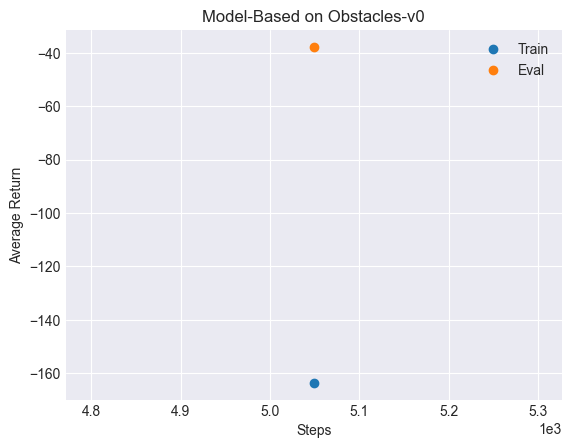

: 

In [35]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
mb = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Train_AverageReturn", "Eval_AverageReturn"])
mb['Train_EnvstepsSoFar'] = mb['Train_EnvstepsSoFar']-1
mb.set_index("Train_EnvstepsSoFar", inplace=True)
mb.columns = ["Train", "Eval"]
for col in mb.columns:
    plt.plot(mb[col], "o", label=col)
plt.legend()
plt.ylabel("Average Return")
plt.xlabel("Steps")
plt.title("Model-Based on Obstacles-v0");
plt.savefig("report/question2.jpg", dpi=600)

## Problem 3

In [21]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q3" in path and "events" in name)]

In [22]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q3_obstacles_obstacles-cs285-v0_28-10-2022_15-56-32\\events.out.tfevents.1666997792.JesperPC']

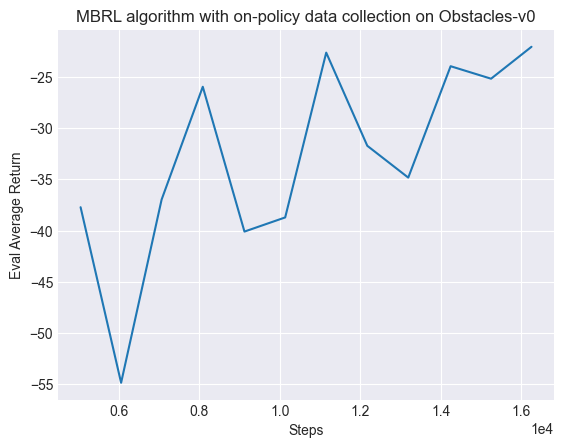

In [30]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
p3_obstacles = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
p3_obstacles['Train_EnvstepsSoFar'] = p3_obstacles['Train_EnvstepsSoFar']-1
p3_obstacles.set_index("Train_EnvstepsSoFar", inplace=True)
p3_obstacles.columns = ["Eval"]


plt.plot(p3_obstacles)
plt.ylabel("Eval Average Return")
plt.xlabel("Steps")
plt.title("MBRL algorithm with on-policy data collection on Obstacles-v0");
plt.savefig("report/question3_1.jpg", dpi=600)

## Problem 4

In [18]:
%tensorboard

UsageError: Line magic function `%tensorboard` not found.
